# Статистический анализ тарифов сотовой связи и выявление наиболее прибыльного для компании

**Описание проекта**

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». *Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.*

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Дана иформация о 500 пользователях «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**
* *Тариф «Смарт»*

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
Сообщение — 3 рубля.

1 Гб интернет-трафика — 200 рублей.

* *Тариф «Ультра»*

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

Минута разговора — 1 рубль;

Сообщение — 1 рубль;

1 Гб интернет-трафика: 150 рублей.

### Открытие файлов и изучение общей информации

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
# открытие файлов
calls=pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
sessions=pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
tariffs=pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
messages=pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
users=pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [4]:
# основная информация о датасетах
print('Информация о calls')
print(calls.info())
print('Информация о sessions')
print(sessions.info())
print('Информация о tariffs')
print(tariffs.info())
print('Информация о messages')
print(messages.info())
print('Информация о users')
print(users.info())

Информация о calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Информация о sessions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Информация о tariffs
<class 'pandas.core.frame.Data

In [5]:
# основная информация о датасетах
print('Информация о calls')
display(calls.describe().T)
print('Информация о sessions')
display(sessions.describe().T)
print('Информация о tariffs')
display(tariffs.describe().T)
print('Информация о messages')
display(messages.describe().T)
print('Информация о users')
display(users.describe().T)

Информация о calls


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Информация о sessions


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Информация о tariffs


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


Информация о messages


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Информация о users


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [6]:
# первые строки датасетов
print('CALLS')
display(calls.head())
print('SESSIONS')
display(sessions.head())
print('TARIFFS')
display(tariffs.head())
print('MESSAGES')
display(messages.head())
print('USERS')
display(users.head())

CALLS


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


SESSIONS


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


TARIFFS


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


MESSAGES


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


USERS


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


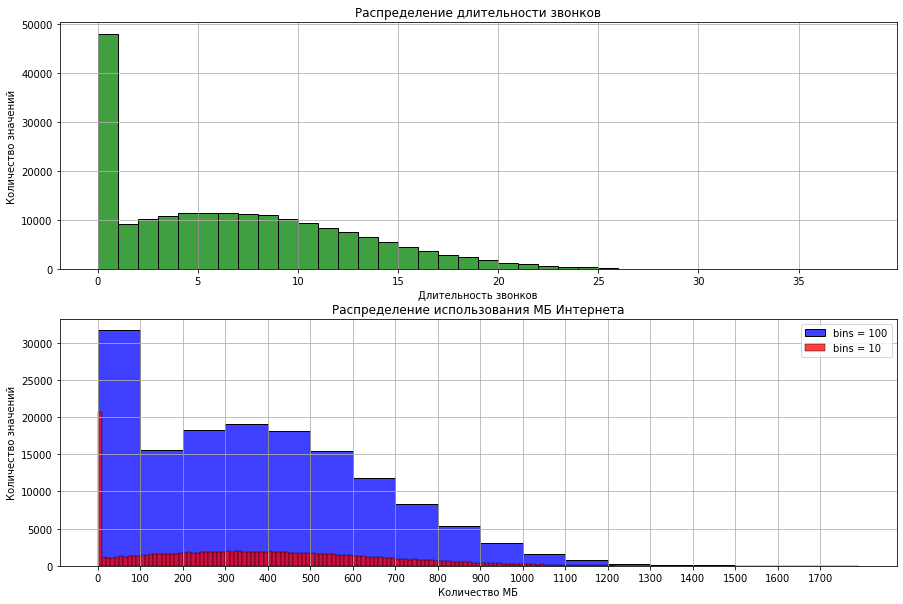

In [7]:
# построение графиков распредления длительности звонков и использования мб Интернета
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.histplot(calls.duration, ax=ax[0], bins=38, color= 'green')
ax[0].set_title('Распределение длительности звонков')
ax[0].set_xlabel('Длительность звонков')
ax[0].grid()
ax[0].set_ylabel('Количество значений')

sns.histplot(sessions.mb_used, ax = ax[1], bins=np.arange(0, 1800, 100), color = 'blue', label='bins = 100' )
sns.histplot(sessions.mb_used, ax = ax[1], bins=np.arange(0,1800,10), color = 'red', label ='bins = 10 ')
ax[1].set_title('Распределение использования МБ Интернета')
ax[1].set_xlabel('Количество МБ')
ax[1].grid()
ax[1].set_ylabel('Количество значений');

plt.sca(ax[0])
plt.xticks(np.arange(0, 38, 5))
plt.sca(ax[1])
plt.xticks(np.arange(0, 1800, 100))
plt.legend()

plt.show()


Проиллюстрировав некоторые показатели из данных можно обратить внимание, что:
* Из 202 тыс значений о длительности звонков - около 50 тыс значений являются нулевыми - они далее будут расценены как пропущенные. Также интересен тот факт, что в данные попали только звонки длительностью менее 38 мин. 
* Такая же тенденция присутствует в данных об использовании мб Интернета - около 20 тыс значений нулевые, остальные распределены от 1 до 1724 мб, достигая максимума в промежутке от 250 до 450 мб

### Подготовка данных

In [8]:
# изменение формата даты
users.reg_date=pd.to_datetime(users.reg_date) # обработка столбца reg_date

users.churn_date=pd.to_datetime(users.churn_date) # обработка столбца churn_date

calls.call_date=pd.to_datetime(calls.call_date) # обработка столбца call_date

messages.message_date=pd.to_datetime(messages.message_date) # обработка столбца message_date
sessions.session_date=pd.to_datetime(sessions.session_date) # обработка столбца session_date

In [9]:
# округление значений столбца duration с помощью np.ceil() и приведение типа к int
calls.duration=np.ceil(calls.duration).astype(int)

In [10]:
# удаление столбца 'Unnamed: 0' из sessions, так как не несет полезной информации
sessions = sessions.drop(['Unnamed: 0'], axis=1)

In [11]:
# создание столбца month в датафреймах с номером месяца
calls['month']=calls.call_date.dt.month
messages['month']=messages.message_date.dt.month
sessions['month']=sessions.session_date.dt.month

In [12]:
# определение количества сделанных звонков разговора для каждого пользователя по месяцам и сохранение в переменную calls_per_month
calls_per_month=calls.groupby(['user_id','month']).agg(calls=('duration','count'))
calls_per_month.head(10)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

In [13]:
# определение количества израсходованных минут разговора для каждого пользователя по месяцам и сохранение в переменную minutes_per_month
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration','sum'))
minutes_per_month.head(10)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

In [14]:
# определение количества отправленных сообщений по месяцам для каждого пользователя и сохранение в переменную messages_per_month
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date','count')) 
messages_per_month.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

In [15]:
# определение количества потраченных мегабайт по месяцам для каждого пользователя и сохранение в переменную sessions_per_month
sessions_per_month = sessions.groupby(['user_id','month']).agg({'mb_used': 'sum'}) 
sessions_per_month.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

### Анализ данных и подсчёт выручки

In [16]:
# рассчет количества расторгнутых договоров
print('Расторгли договор', (users['churn_date'].count() / users['churn_date'].shape[0] * 100), '% клиентов из датасета')

Расторгли договор 7.6 % клиентов из датасета


Объединение подсчитанных ранее значения в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [17]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [18]:
# рассчет количества пропусков 
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [19]:
# заполнение образовавшихся пропусков
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [20]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [21]:
# присоединение информации о тарифе
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [22]:
# рассчет количества минут разговора, сообщений и мегабайт, превышающих включенные в тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0


In [23]:
# переводим превышающие тариф мегабайты в гигабайты и сохранение в столбец `paid_gb`
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [24]:
# рассчет выручки за минуты разговора, сообщения и интернет
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [25]:
# рассчет помесячной выручки с каждого пользователя, сохранение в столбец `total_cost`
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [26]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


#### Распределение среднего количества звонков по видам тарифов и месяцам

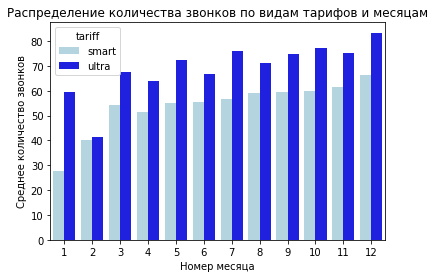

In [27]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');


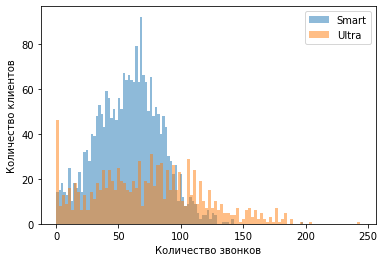

In [28]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist',bins=100, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

In [29]:
user_behavior.groupby('tariff')['calls'].max()

tariff
smart    198.0
ultra    244.0
Name: calls, dtype: float64

**Выводы**

В среднем пользователи тарифа Ультра совершают больше звонков, чем пользователи тарифа Смарт. Месяц, в котором было совершено больше всего звонков для обоих тарифов - декабрь (связано с поздравлениями с праздниками)

По общему количеству звонков видно, что большее количество пользователей используют тариф Смарт. Эти пользователи в основном совершают от 30 до 90 звонков в месяц. У пользователей тарифа Ультра наблюдается пик в нулевом значении, характеризующий большое количество пропущенных звонков. Также в тарифе Ультра присутствуют пользователи, совершающие от 150 до 250 звонков в месяц. Однако оснавная масса пользователей данного тарифа совершает до 120 звонков в месяц.

#### Распределение средней продолжительности звонков по видам тарифов и месяцам

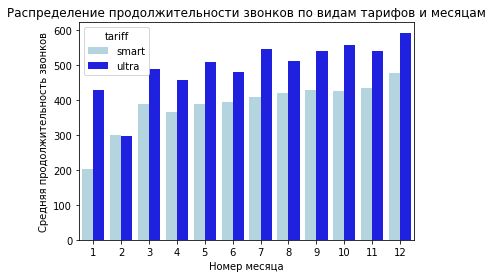

In [30]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

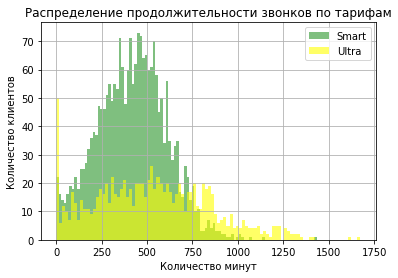

In [31]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=100, alpha=0.5, color='green');
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=100, alpha=0.6, color='yellow');
plt.legend(['Smart','Ultra'])
plt.title('Распределение продолжительности звонков по тарифам')
plt.xlabel('Количество минут')
plt.ylabel('Количество клиентов')
plt.show()


**Вывод**

Средняя длительность разговоров у абонентов тарифа Ультра больше, чем у абонентов тарифа Смарт. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Смарт равномерный в течение года. Пользователи тарифа Ультра не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов тарифа Ультра наблюдались самые низкие показатели, а у абонентов тарифа Смарт в январе.

#### Распределение среднего количества сообщений по видам тарифов и месяцам

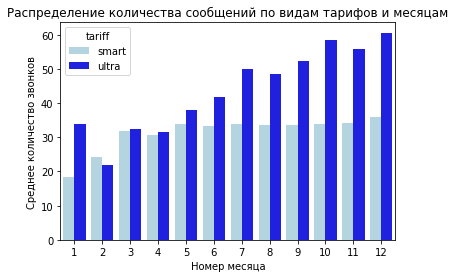

In [32]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

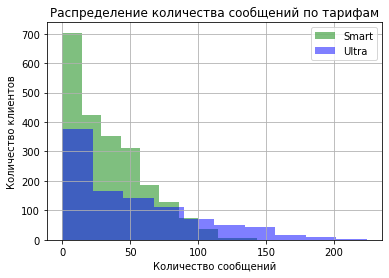

In [33]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=10, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=10, alpha=0.5, color='blue');
plt.legend(['Smart','Ultra'])
plt.title('Распределение количества сообщений по тарифам')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.show()

**Вывод** 

В среднем количество сообщений пользователи тарифа Ультра отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Смарт. Количество сообщений в течение года на обоих тарифах растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ультра также проявляют нелинейную положительную динамику.

#### Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам

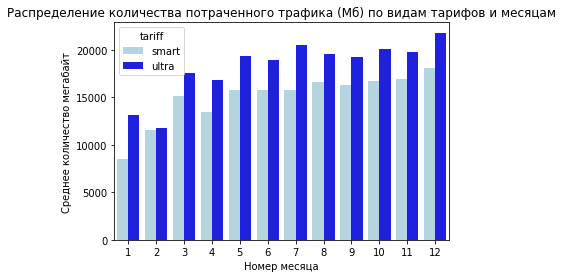

In [34]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

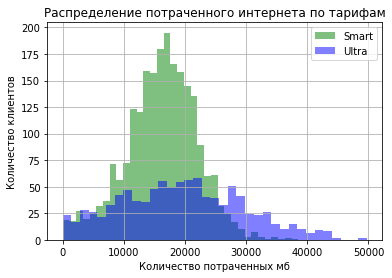

In [35]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');
plt.legend(['Smart','Ultra'])
plt.title('Распределение потраченного интернета по тарифам')
plt.xlabel('Количество потраченных мб')
plt.ylabel('Количество клиентов')
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Смарт тратят 15-17 Гб, а абоненты тарифного плана Ультра - 19-21 ГБ.

#### Топ5 городов пользователей тарифов SMART и ULTRA по числу пользователей и выручке

In [36]:
# построение сводных таблиц
city_tar = user_behavior[['user_id','city','tariff']].drop_duplicates()
city_tar = city_tar[['city','tariff']]
v= city_tar.groupby(by=['tariff','city']).agg(number_of_users =('city','count')).reset_index()

ctm = user_behavior[['user_id','city','tariff','month','total_cost']].drop_duplicates()
ctmpv = ctm.groupby(by=['tariff','city']).agg(number_of_users =('city','count'), total_cost = ('total_cost','sum')).reset_index()

In [37]:
# объединение сводных таблиц
ctmpvn = v.merge (ctmpv, how = 'outer',on = ['tariff','city'])
ctmpvn = ctmpvn [['tariff', 'city', 'number_of_users_x', 'total_cost']].rename(columns= {'number_of_users_x':'number_of_users'})

In [38]:
# вывод результата
print('ТОП5 городов пользователей тарифа "SMART" по числу пользователей')
display(ctmpvn[ctmpvn['tariff']=='smart'][['city','number_of_users','total_cost']].sort_values(by='number_of_users', ascending=False).head(5))
print('ТОП5 городов пользователей тарифа "ULTRA" по числу пользователей')
display(ctmpvn[ctmpvn['tariff']=='ultra'][['city','number_of_users','total_cost']].sort_values(by='number_of_users', ascending=False).head(5))

ТОП5 городов пользователей тарифа "SMART" по числу пользователей


,city,number_of_users,total_cost
29,Москва,67,478392.0
47,Санкт-Петербург,30,306182.0
16,Казань,13,88243.0
36,Новосибирск,11,88592.0
62,Ульяновск,10,101236.0


ТОП5 городов пользователей тарифа "ULTRA" по числу пользователей


,city,number_of_users,total_cost
94,Москва,32,466650.0
109,Санкт-Петербург,9,130800.0
123,Уфа,6,58650.0
101,Новосибирск,5,85950.0
89,Краснодар,5,79950.0


In [39]:
# вывод результата
print('ТОП5 городов пользователей тарифа "SMART" по выручке')
display(ctmpvn[ctmpvn['tariff']=='smart'][['city','number_of_users','total_cost']].sort_values(by='total_cost', ascending=False).head(5))
print('ТОП5 городов пользователей тарифа "ULTRA" по выручке')
display(ctmpvn[ctmpvn['tariff']=='ultra'][['city','number_of_users','total_cost']].sort_values(by='total_cost', ascending=False).head(5))

ТОП5 городов пользователей тарифа "SMART" по выручке


,city,number_of_users,total_cost
29,Москва,67,478392.0
47,Санкт-Петербург,30,306182.0
62,Ульяновск,10,101236.0
36,Новосибирск,11,88592.0
16,Казань,13,88243.0


ТОП5 городов пользователей тарифа "ULTRA" по выручке


,city,number_of_users,total_cost
94,Москва,32,466650.0
109,Санкт-Петербург,9,130800.0
101,Новосибирск,5,85950.0
104,Пенза,5,84000.0
89,Краснодар,5,79950.0


**Вывод**

Таким образом, в обоих рейтингах по количеству пользователей тарифа в городах и по общей сумме выручки первые места принадлежат Москве и Санкт-Петербургу, причем показатели Москвы почти в 2 раза превышают те же у Санкт-Петербурга. 

Для тарифа Смарт одним из важнейших по выручке городов после гигантов является Ульяновск, а для тарифа Ультра - Новосибирск и Пенза.

### Проверка гипотез

Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [40]:
results = st.ttest_ind(user_behavior[user_behavior['tariff']=='ultra']['total_cost'],\
                       user_behavior[user_behavior['tariff']=='smart']['total_cost'],\
                      equal_var=False) # results = вызов метода для проверки гипотезы

alpha = .05

print(results.pvalue) 
# вывод значения p-value на экран 

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')
# условный оператор с выводом строки с ответом

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Гипотеза подтверждена

Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [42]:
results = st.ttest_ind(user_behavior[user_behavior['city']=='Москва']['total_cost'],\
                       user_behavior[user_behavior['city']!='Москва']['total_cost'],\
                      equal_var=False) # results = вызов метода для проверки гипотезы

alpha = .05

print(results.pvalue) 
# вывод значения p-value на экран 

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу 


Гипотеза не подтверждена

### Выбор наиболее прибыльного для компании тарифа

In [43]:
# суммирование общих доплат клиента вне тарифа
user_behavior['cost_sum'] = user_behavior[['cost_minutes','cost_messages','cost_gb']].sum(axis=1).astype(int)
# создание сводной таблицы по тарифам
pvu = user_behavior.groupby(by=['tariff'])[['total_cost','cost_sum','rub_monthly_fee']].agg('sum').reset_index()

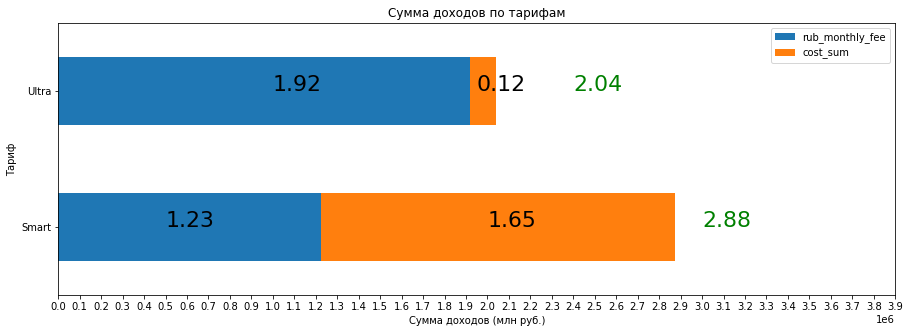

,tariff,total_cost,cost_sum,rub_monthly_fee
0,smart,2875351.0,1649401,1225950
1,ultra,2039100.0,118350,1920750


In [44]:
# построение графика
fig, ax = plt.subplots(figsize =(15, 5))

pvu[['rub_monthly_fee','cost_sum']].plot.barh(stacked=True,ax=ax)
plt.legend(['rub_monthly_fee','cost_sum'])

plt.title('Сумма доходов по тарифам')
plt.ylabel('Тариф')
plt.xlabel('Сумма доходов (млн руб.)')
plt.yticks([0,1],['Smart','Ultra'])
plt.xticks(np.arange(0,4000000,100000))

plt.text(3000000,0, round(pvu['total_cost'][0]/1000000,2), fontsize = 22, color = 'green')
plt.text(2000000,0, round(pvu['cost_sum'][0]/1000000,2), fontsize = 22)
plt.text(500000,0, round(pvu['rub_monthly_fee'][0]/1000000,2), fontsize = 22)

plt.text(2400000,1, round(pvu['total_cost'][1]/1000000,2), fontsize = 22, color = 'green')
plt.text(1950000,1, round(pvu['cost_sum'][1]/1000000,2), fontsize = 22)
plt.text(1000000,1, round(pvu['rub_monthly_fee'][1]/1000000,2), fontsize = 22)

plt.show()

display (pvu)

**Общий вывод**

Таким образом, наибольшую прибыль для компании приносят пользователи тарифа SMART - 2 875 351 руб. это на 41% больше, чем прибыль, приносимая клиентами, использующими тариф ULTRA - 2 039 100 руб.

Однако можно обратить внимание, что большую часть прибыли тарифа ULTRA приносят ежемесячные платежи (94.2% от суммы общих платежей тарифа), а для тарифа SMART - платежи сверх предотавляемого лимита (57.4%)
